In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

In [3]:
ACT = xr.open_dataset('../Data/ACTtransport_insitu.nc')
ACT = ((ACT.Tbox/1000000)*-1).resample(time='1d').mean()
HYCOMfree = xr.open_dataset('../Data/HYCOMfree_transportACT.nc')
HYCOMcci = xr.open_dataset('../Data/HYCOMcci_transportACT.nc')

In [43]:
HYCOMcci.transport.squeeze().shape

(1040,)

In [41]:
ACT.shape

(1040,)

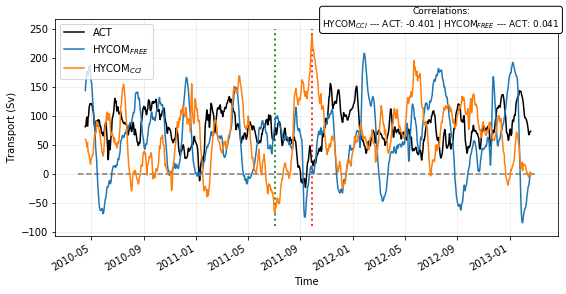

In [13]:
# # calculating correlations
corr_cciact = round(np.corrcoef(HYCOMcci.transport[:,0],ACT)[0,1],3)
corr_freeact = round(np.corrcoef(HYCOMfree.transport[:,0],ACT)[0,1],3)
textbox = 'Correlations:\nHYCOM$_{CCI}$ --- ACT: ' + '{0}'.format(corr_cciact) + ' | HYCOM$_{FREE}$ --- ACT: ' + '{0}'.format(corr_freeact)

fig = plt.figure(figsize=(9,4))
plt.hlines(0,xmin=pd.to_datetime('2010-04-01'), xmax=pd.to_datetime('2013-03-01'), linestyle='dashed', alpha=0.5)
plt.vlines(pd.to_datetime('2011-09-28'),ymin=-90, ymax=250, color='red', linestyle='dotted', linewidth=2, alpha=0.85)
plt.vlines(pd.to_datetime('2011-07-03'),ymin=-90, ymax=250, color='green', linestyle='dotted', linewidth=2, alpha=0.85)
ACT.plot(label='ACT', color='k')
HYCOMfree.transport.plot(label='HYCOM$_{FREE}$')
HYCOMcci.transport.plot(label='HYCOM$_{CCI}$')
plt.grid(alpha=0.25)
plt.ylabel('Transport (Sv)')
plt.xlabel('Time')
fig.text(0.72, 0.88, textbox, fontsize=9, verticalalignment='center', horizontalalignment='center',transform=fig.transFigure, bbox = dict(boxstyle='round', facecolor='white'))
plt.legend()
plt.savefig('../Figures/act/Trans_tbox.png', dpi=300, bbox_inches='tight', format='png')

In [7]:
HYCOMcci.where(HYCOMcci.transport==HYCOMcci.transport.max(), drop=True).squeeze()

<xarray.Dataset>
Dimensions:           (N_2: 2)
Coordinates:
    time              datetime64[ns] 2011-09-28T12:00:00
Dimensions without coordinates: N_2
Data variables:
    sectionname       object b'ACT_ARRAY           '
    section_lon       (N_2) float32 27.76488 28.905796
    section_lat       (N_2) float32 -33.59943 -35.54219
    transport         float32 238.82446
    transport_neg     float32 -0.9523389
    transport_pos     float32 239.7768
    icetransport      float32 0.0
    icetransport_neg  float32 0.0
    icetransport_pos  float32 0.0
Attributes:
    title:        TOPAZ transport across sections
    institution:  NERSC, Thormoehlens gate 47, N-5006 Bergen, Norway
    references:   http://topaz.nersc.no
    comment:      Transports are defined as positive if it is towards the rig...

In [8]:
HYCOMcci.where(HYCOMcci.transport==HYCOMcci.transport.min(), drop=True).squeeze()

<xarray.Dataset>
Dimensions:           (N_2: 2)
Coordinates:
    time              datetime64[ns] 2011-07-03T12:00:00
Dimensions without coordinates: N_2
Data variables:
    sectionname       object b'ACT_ARRAY           '
    section_lon       (N_2) float32 27.76488 28.905796
    section_lat       (N_2) float32 -33.59943 -35.54219
    transport         float32 -67.48152
    transport_neg     float32 -109.96445
    transport_pos     float32 42.482925
    icetransport      float32 0.0
    icetransport_neg  float32 0.0
    icetransport_pos  float32 0.0
Attributes:
    title:        TOPAZ transport across sections
    institution:  NERSC, Thormoehlens gate 47, N-5006 Bergen, Norway
    references:   http://topaz.nersc.no
    comment:      Transports are defined as positive if it is towards the rig...

In [ ]:
# read SST datasets
